In [ ]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy.cli
spacy.cli.download("ru_core_news_sm")
spacy.cli.download("uk_core_news_sm")
from pymorphy2 import MorphAnalyzer
import sqlite3
import csv
import string
import re

✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
✔ Download and installation successful
You can now load the package via spacy.load('uk_core_news_sm')


This project is dedicated to comparison of sentences with double vs single negation in verbal-elliptic constructions in Russian, Ukrainian and Belarusian. Installation, downloading and imports are successful. Everything is ready for work.

In [ ]:
with open('nc_ru.tsv', 'r', encoding='utf-8') as f1:
    rulines = f1.readlines()
    metadata = rulines[0]
    heads_ru = metadata.split("\t")
    rusents = heads_ru[1:]
    rumorph = MorphAnalyzer()
    rutargets_prelim = []
    rusents = [rusent.strip(',.\n') for rusent in rusents]
    for rusent in rusents:
      ruwords = rusent.split(" ")
      ruwords = [ruword for ruword in ruwords if ruword and ruword != "-"]
      rumorphans = []
      dictlist = []
      for ruword in ruwords:
        rusana = rumorph.parse(ruword)
        rusana1 = rusana[0]
        dict_meta = {}
        dict_meta["word"] = rusana1.word
        dict_meta["pos"] = rusana1.tag.POS
        dict_meta["pers"] = rusana1.tag.person
        dictlist.append(dict_meta)
      for dictionary in dictlist:
        if dictionary["pos"] == "NPRO" and dictionary["word"] != "многие" and not dictionary["pers"]:
          rumorphans.append(dictionary)
        if dictionary["word"] == "никогда":
          rumorphans.append(dictionary)
      if rumorphans:
        rutargets_prelim.append(rusent)
    indices = []
    for rupre in rutargets_prelim:
      if rupre in rusents:
        indices.append(rusents.index(rupre))
with open('nc_ru.tsv', newline= "") as ff1:
    new_csv = []
    reader = csv.reader(ff1, delimiter = "\t")
    indices = [i+1 for i in indices]
    indices.append(0)
    indices = [indices[len(indices)-1]] + indices[0:len(indices)-1]
    for row in reader:
      col = list(row[i] for i in indices)
      new_csv.append(col)

In [ ]:
with open ('nc_ru2.tsv', 'w') as fw1:
  writer = csv.writer(fw1, delimiter = "\t")
  for new_line in new_csv:
    writer.writerow(new_line)

Thus, Russian data have undergone the first (morphological) stage of sort.

In [ ]:
with open('nc_ua.tsv', 'r', encoding='utf-8') as f2:
    ualines = f2.readlines()
    umetadata = ualines[0]
    heads_ua = umetadata.split("\t")
    uasents = heads_ua[1:]
    uamorph = MorphAnalyzer(lang="uk")
    uatargets_prelim = []
    uasents = [uasent.strip(',.\n') for uasent in uasents]
    for uasent in uasents:
      uawords = uasent.split(" ")
      uawords = [uaword for uaword in uawords if uaword and uaword != "-"]
      uamorphans = []
      udictlist = []
      for uaword in uawords:
        ukrana = uamorph.parse(uaword)
        ukrana1 = ukrana[0]
        udict_meta = {}
        udict_meta["word"] = ukrana1.word
        udict_meta["pos"] = ukrana1.tag.POS
        udict_meta["pers"] = ukrana1.tag.person
        udictlist.append(udict_meta)
      for udict in udictlist:
        print(udict)

{'word': 'вона', 'pos': 'NPRO', 'pers': None}
{'word': 'багато', 'pos': 'ADVB', 'pers': None}
{'word': 'разiв', 'pos': 'VERB', 'pers': None}
{'word': 'читала', 'pos': 'VERB', 'pers': None}
{'word': 'цю', 'pos': 'NPRO', 'pers': None}
{'word': 'книгу,', 'pos': None, 'pers': None}
{'word': 'але', 'pos': 'CONJ', 'pers': None}
{'word': 'нiколи', 'pos': 'NOUN', 'pers': None}
{'word': 'до', 'pos': 'NOUN', 'pers': None}
{'word': 'кiнця', 'pos': 'NOUN', 'pers': None}
{'word': 'при', 'pos': 'VERB', 'pers': '2per'}
{'word': 'виборі', 'pos': 'NOUN', 'pers': None}
{'word': 'мов', 'pos': 'PRCL', 'pers': None}
{'word': 'багато', 'pos': 'ADVB', 'pers': None}
{'word': 'студентів', 'pos': 'NOUN', 'pers': None}
{'word': 'записувалися', 'pos': 'VERB', 'pers': None}
{'word': 'на', 'pos': 'INTJ', 'pers': None}
{'word': 'французьку,', 'pos': None, 'pers': None}
{'word': 'німецьку,', 'pos': None, 'pers': None}
{'word': 'але', 'pos': 'CONJ', 'pers': None}
{'word': 'ніхто', 'pos': 'NPRO', 'pers': None}
{'word':

As we see now, Ukrainian morphological analyzer works much worse (e.g., persons are not defined for pronouns; "нiколи" is not a noun, but an adverb "never"). For Belarusian, there is no pymorphy package at all. Thus, due to the fact that the languages belong to the same subgroup (East Slavonic), it could be reasonable to agree that the sentences with the same indices as for Russian will be included into the preliminary targets list.

In [ ]:
with open('nc_ua.tsv', newline= "") as ff2:
    new_ucsv = []
    reader2 = csv.reader(ff2, delimiter = "\t")
    for row in reader2:
      ucol = list(row[i] for i in indices)
      new_ucsv.append(ucol)
with open('nc_by.tsv', newline= "") as ff3:
    new_bycsv = []
    reader3 = csv.reader(ff3, delimiter = "\t")
    for row in reader3:
      bycol = list(row[i] for i in indices)
      new_bycsv.append(bycol)

In [ ]:
with open ('nc_ua2.tsv', 'w') as fw2:
  writer = csv.writer(fw2, delimiter = "\t")
  for new_uline in new_ucsv:
    writer.writerow(new_uline)
with open ('nc_by2.tsv', 'w') as fw3:
  writer = csv.writer(fw3, delimiter = "\t")
  for new_byline in new_bycsv:
    writer.writerow(new_byline)

In [ ]:
with open('nc_ua2.tsv', 'r', encoding='utf-8') as c1:
    ualines2 = c1.readlines()
    metadata2 = ualines2[0]
    heads2_ua = metadata2.split("\t")
    uasents2 = heads2_ua[1:]
    uatargets = []
    uasents2 = [uasent2.strip(',.\n') for uasent2 in uasents2]
    ulp = spacy.load("uk_core_news_sm")
    for uasent2 in uasents2:
      uatree = ulp(uasent2)
      uasyntans = []
      for uatoken in uatree:
        uchildren = [uchild for uchild in uatoken.children]
        if len(uchildren) > 3:
          uasyntans.append(uatoken)
      if uasyntans:
        uatargets.append(uasent2)
    nindices = []
    for uatarget in uatargets:
      if uatarget in uasents2:
        nindices.append(uasents2.index(uatarget))
        
with open('nc_ua2.tsv', newline= "") as cc1:
    final_csv = []
    reader = csv.reader(cc1, delimiter = "\t")
    nindices = [ni+1 for ni in nindices]
    nindices.append(0)
    nindices = [nindices[len(nindices)-1]] + nindices[0:len(nindices)-1]
    for row in reader:
      ncol = list(row[ni] for ni in nindices)
      final_csv.append(ncol)

In [ ]:
with open ('finc_ua.tsv', 'w') as cw1:
  writer = csv.writer(cw1, delimiter = "\t")
  for fin_line in final_csv:
    writer.writerow(fin_line)

Thus, Ukrainian data have undergone the second (syntactic) stage of sort. For the ellipsis to occur, it is essential that the sentence possess several arguments/adjuncts or be polypredicative. Thus, it has to have 4 or more dependencies of one token.

In [ ]:
with open('nc_ru2.tsv', 'r', encoding='utf-8') as c2:
    rulines2 = c2.readlines()
    rumetadata2 = rulines2[0]
    heads2_ru = rumetadata2.split("\t")
    rusents2 = heads2_ru[1:]
    rutargets = []
    rusents2 = [rusent2.strip(',.\n') for rusent2 in rusents2]
    rlp = spacy.load("ru_core_news_sm")
    for rusent2 in rusents2:
      rutree = rlp(rusent2)
      rusyntans = []
      for rutoken in rutree:
        print(rutoken.text, rutoken.dep_, rutoken.head.text,
            [ruchild for ruchild in rutoken.children])

Она nsubj читала []
много advmod раз []
раз obl читала [много]
читала ROOT читала [Она, раз, книгу]
эту det книгу []
книгу obj читала [эту]
, punct но []
но ROOT но [,, никогда, конца]
никогда case но []
- case конца []
до case конца []
конца case но [-, до]
При case выборе []
выборе obl записалось [При, языков]
языков nmod выборе []
много nsubj записалось [студентов]
студентов obl много []
записалось ROOT записалось [выборе, много, на, хинди]
на case записалось [французский]
французский case на [немецкий]
, punct немецкий []
немецкий conj французский [,]
, punct хинди []
но cc хинди []
никто nsubj хинди []
не advmod хинди []
на case хинди []
хинди conj записалось [,, но, никто, не, на]
Кого obj знал []
- obj знал []
то obj знал [людей]
из case людей []
этих det людей []
людей nmod то [из, этих]
я nsubj знал []
не advmod знал []
знал ROOT знал [Кого, -, то, я, не]
Кому iobj лет []
- iobj лет []
то iobj лет []
из case них []
них nmod лет [из]
15 nummod лет []
лет ROOT лет [Кому, -, то, 

As we see now, Russian syntactic analyzer works much worse (e.g., "кто-то" (somebody) is parsed as 3 tokens). For Belarusian, there is no spacy package at all. Thus, due to the fact that the languages belong to the same subgroup (East Slavonic), it could be reasonable to agree that the sentences with the same indices as for Ukrainian will be included into the final targets list.

In [ ]:
with open('nc_ru2.tsv', newline= "") as cc2:
    final_rucsv = []
    reader2 = csv.reader(cc2, delimiter = "\t")
    for row in reader2:
      runcol = list(row[ni] for ni in nindices)
      final_rucsv.append(runcol)
with open('nc_by2.tsv', newline= "") as cc3:
    final_bycsv = []
    reader3 = csv.reader(cc3, delimiter = "\t")
    for row in reader3:
      byncol = list(row[ni] for ni in nindices)
      final_bycsv.append(byncol)

In [ ]:
with open ('finc_ru.tsv', 'w') as cw2:
  writer = csv.writer(cw2, delimiter = "\t")
  for fin_ruline in final_rucsv:
    writer.writerow(fin_ruline)
with open ('finc_by.tsv', 'w') as cw3:
  writer = csv.writer(cw3, delimiter = "\t")
  for fin_byline in final_bycsv:
    writer.writerow(fin_byline)

In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('nc_eslav.db')
c = conn.cursor()
with open('finc_ru.tsv', 'r', encoding='utf-8') as r1:
    r1 = r1.readlines()
    rudata = r1[1:]
c.execute("DROP TABLE IF EXISTS russian")
c.execute("CREATE TABLE IF NOT EXISTS russian(time text, s1 float, s2 float, s3 float, s4 float, s5 float, s6 float, language text)")
for row in rudata:
  row = row.split('\t')
  c.execute("INSERT INTO russian VALUES (?, ?, ?, ?, ?, ?, ?, ?)", (row[0], row[1], row[2], row[3], row[4], row[5], row[6], "Russian"))
with open('finc_ua.tsv', 'r', encoding='utf-8') as r2:
    r2 = r2.readlines()
    uadata = r2[1:]
c.execute("DROP TABLE IF EXISTS ukrainian")
c.execute("CREATE TABLE IF NOT EXISTS ukrainian(time text, s1 float, s2 float, s3 float, s4 float, s5 float, s6 float, language text)")
for row in uadata:
  row = row.split('\t')
  c.execute("INSERT INTO ukrainian VALUES (?, ?, ?, ?, ?, ?, ?, ?)", (row[0], row[1], row[2], row[3], row[4], row[5], row[6], "Ukrainian"))
with open('finc_by.tsv', 'r', encoding='utf-8') as r3:
    r3 = r3.readlines()
    bydata = r3[1:]
c.execute("DROP TABLE IF EXISTS belarusian")
c.execute("CREATE TABLE IF NOT EXISTS belarusian(time text, s1 float, s2 float, s3 float, s4 float, s5 float, s6 float, language text)")
for row in bydata:
  row = row.split('\t')
  c.execute("INSERT INTO belarusian VALUES (?, ?, ?, ?, ?, ?, ?, ?)", (row[0], row[1], row[2], row[3], row[4], row[5], row[6], "Belarusian"))
dfru = pd.read_sql_query("SELECT * from russian", conn)
dfua = pd.read_sql_query("SELECT * from ukrainian", conn)
dfby = pd.read_sql_query("SELECT * from belarusian", conn)
conn.commit()
conn.close()

The database contains 3 tables, each table is dedicated to a particular East Slavonic language and contains 7 columns (first column contains a date and time of an answer, which serves as an ID, while others contain grades given to a particular sentence) and 10 to 50 rows (which contain grades given by a particular informant).

In [ ]:
dfeslav = pd.concat([dfru, dfua, dfby], ignore_index=True)
print(dfeslav)

                   time    s1   s2   s3   s4    s5   s6    language
0   30.05.2019 13:28:50   3.0  2.0  4.0  2.0   5.0  2.0     Russian
1   30.05.2019 13:32:22   4.0  1.0  2.0  4.0   5.0  3.0     Russian
2   30.05.2019 13:47:54   4.0  1.0  5.0  3.0   5.0  1.0     Russian
3   30.05.2019 13:49:48   2.0  4.0  3.0  4.0   5.0  4.0     Russian
4   30.05.2019 13:50:54   4.0  1.0  5.0  1.0   5.0  1.0     Russian
..                  ...   ...  ...  ...  ...   ...  ...         ...
65  06.06.2019 15:29:41   7.5  0.0  2.5  2.5  10.0  0.0  Belarusian
66  06.06.2019 15:53:27  10.0  2.5  7.5  5.0  10.0  0.0  Belarusian
67  07.06.2019 10:31:00   7.5  2.5  7.5  7.5  10.0  2.5  Belarusian
68  07.06.2019 11:06:30   7.5  5.0  7.5  7.5  10.0  5.0  Belarusian
69  07.06.2019 11:26:46   7.5  7.5  7.5  5.0   7.5  2.5  Belarusian

[70 rows x 8 columns]


The dataframe has been created, now it's time to manipulate it.

In [ ]:
sentences = ["s1", "s2", "s3", "s4", "s5", "s6"]
import numpy as np
for sentence in sentences:
  dfeslav[sentence].mask(dfeslav['language'] == "Russian", 50 * dfeslav[sentence] - 150, inplace = True)
  dfeslav[sentence].mask(dfeslav['language'] == "Ukrainian", 200/12 * dfeslav[sentence] - 100, inplace = True)
  dfeslav[sentence].mask(dfeslav['language'] == "Belarusian", 20 * dfeslav[sentence] - 100, inplace = True)

Manipulation 1: the values in the columns have been normalized to bilateral 100-point scale

In [ ]:
dfeslav["mean_single"] = dfeslav[['s1', 's3', 's5']].mean(axis=1)
dfeslav["mean_double"] = dfeslav[['s2', 's4', 's6']].mean(axis=1)

Manipulation 2: columns have been added

In [ ]:
dfeslav_forsingle = dfeslav[dfeslav["mean_single"] > dfeslav["mean_double"]]
dfeslav_fordouble = dfeslav[dfeslav["mean_single"] < dfeslav["mean_double"]]
dfeslav_neutral = dfeslav[dfeslav["mean_single"] == dfeslav["mean_double"]]

Manipulation 3: subsets have been taken

In [ ]:
dfeslav_national = dfeslav.groupby("language").agg({"s1": "mean", "s2": "mean", "s3": "mean",
                                                    "s4": "mean", "s5": "mean", "s6": "mean"})
dfeslav_national

,s1,s2,s3,s4,s5,s6
language,,,,,,
Belarusian,50.0,-40.0,15.0,-10.0,60.0,-60.0
Russian,2.0,-57.0,14.0,-12.0,42.0,-46.0
Ukrainian,25.0,-70.0,-10.0,-30.0,30.0,-45.0


Manipulation 4: grouping has been carried out

Text(0, 0.5, 'correctness')

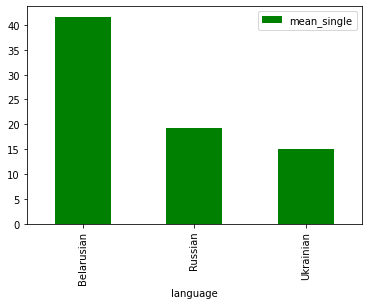

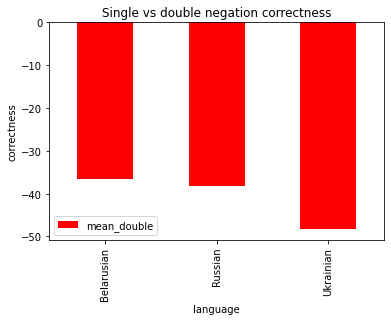

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
dfeslav.groupby("language").agg({"mean_single": "mean"}).plot.bar(color="green")
dfeslav.groupby("language").agg({"mean_double": "mean"}).plot.bar(color="red")
plt.title("Single vs double negation correctness")
plt.xlabel("language")
plt.ylabel("correctness")

Graph 1 shows dependence of correctness indices from a language. It has shown that Belarusian speakers demonstrate the strongest support towards single negation, while Russian and Ukrainian are almost equal. Ukrainian speakers demonstrate the most negative reaction towards double negation, while Russian and Belarusian are almost equal.

Text(0, 0.5, 'Polarization')

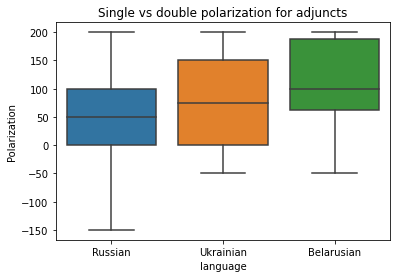

In [ ]:
sns.boxplot(x="language", y=dfeslav["s1"]-dfeslav["s6"], data=dfeslav)
plt.title('Single vs double polarization for adjuncts')
plt.ylabel('Polarization')

Text(0, 0.5, 'Polarization')

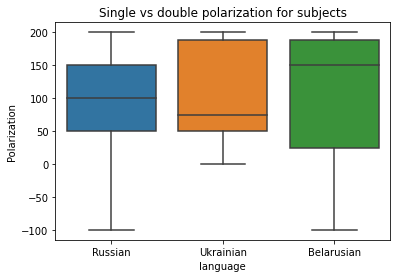

In [ ]:
sns.boxplot(x="language", y=dfeslav["s5"]-dfeslav["s2"], data=dfeslav)
plt.title('Single vs double polarization for subjects')
plt.ylabel('Polarization')

Text(0, 0.5, 'Polarization')

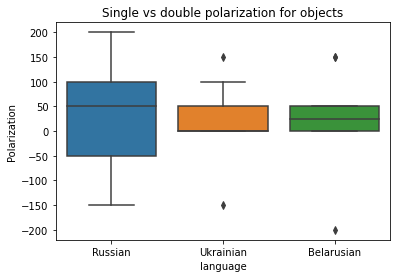

In [ ]:
sns.boxplot(x="language", y=dfeslav["s3"]-dfeslav["s4"], data=dfeslav)
plt.title('Single vs double polarization for objects')
plt.ylabel('Polarization')


Graph 2 shows polarization between single and double negation in different languages and for different roles.
For adjuncts (never) Belarusian shows the largest polarization, while Russian shows the smallest. For subjects, Belarusian also shows the largest polarization. For objects, it is almost equal, but Russian has the smallest 3rd quartile.

Text(0.5, 1.0, 'Choices')

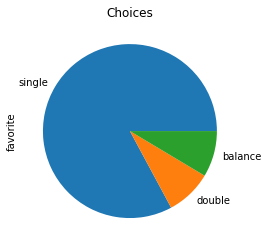

In [ ]:
conditions = [dfeslav["mean_single"] > dfeslav["mean_double"], dfeslav["mean_single"] < dfeslav["mean_double"], dfeslav["mean_single"] == dfeslav["mean_double"]]
choices = ["single", "double", "balance"]
dfeslav['favorite'] = np.select(conditions, choices)
dfeslav['favorite'].value_counts().plot(kind='pie')
plt.title("Choices")

Graph 3 shows how many informants prefer single/double negation or use both of them equally (across languages). Vast majority of informants use single negation. Those who don't might prefer double negation or be neutral with approximately equal probability.

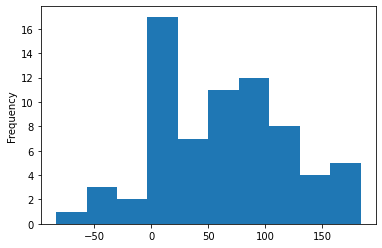

In [ ]:
dfeslav["polarization"] = dfeslav["mean_single"] - dfeslav["mean_double"]
dfeslav["polarization"].plot(kind="hist")

Graph 4 shows distribution of polarization. As we see, the main peak is between 0 and 50 (closer to 0), while the second one is between 50 and 100. Distribution is not normal, but it is quite close.